In [1]:
import os
os.chdir("C:\\Users\\rebeccalai\\OneDrive\\desktop\\movie")
import pandas as pd 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# for every x, calculating the VIF and save it in dataframe
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#create confusion matrix
def performace(y_test,y_pred):
    m1 = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("confusionmatrix:")
    print( m1 )
    print(f"accuracy:{acc}")
    print(f"precision:{pre}")
    print(f"recall:{rec}")
    print(f"F1-score:{f1}")

In [3]:
# load data
url_train = "train.csv"
train = pd. read_csv (url_train )

train.describe ()
train["Lead"]. replace("Female", 1, inplace = True )
train["Lead"]. replace ("Male", 0, inplace = True )

Y = train["Lead"]
X = train.drop(["Lead","Year"],axis =1)
# LDA assume the prior probability is the sample distribution probability
print (f"female : {Y.sum ()/len (Y)* 100}%") # female is 1 and male is 0
print (f"male : {(len(Y)-Y.sum ())/ len(Y)*100}%") 

female : 24.446583253128008%
male : 75.55341674687199%


In [4]:
calc_vif(X)
# # #  attention many Inf， so it has some Co-linear variables. actually we need no more variables with a VIF above 10.

d:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Number words female,inf
1,Total words,inf
2,Number of words lead,inf
3,Difference in words lead and co-lead,16.476516
4,Number of male actors,9.734203
5,Number of female actors,6.042587
6,Number words male,inf
7,Gross,1.594579
8,Mean Age Male,29.464613
9,Mean Age Female,24.723117


## LDA

In [5]:
# Split 
X_train , X_test , y_train , y_test = train_test_split (X, Y, test_size =0.2, random_state =1)

# Normalize the data
s = StandardScaler ()
X_train = s. fit_transform (X_train)
X_test = s. fit_transform (X_test)

# A useful command is sklearn.discriminant_analysis.LinearDiscriminantAnalysis(). sklearn.discriminant_analysis is imported
# maybe we can use PolynomialFeatures later
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB

LDA_model_default = LinearDiscriminantAnalysis()
LDA_model_default.fit(X_train, y_train)
y_pred_LDA_default =LDA_model_default.predict(X_test)
performace(y_test,y_pred_LDA_default) # confusion matrix: row is the true label.

confusionmatrix:
[[151  16]
 [ 11  30]]
accuracy:0.8701923076923077
precision:0.6521739130434783
recall:0.7317073170731707
F1-score:0.6896551724137931


In [6]:
#Parameter tuning with GridSearchCV 
grid = dict()
grid['solver']=['lsqr',"svd"] # ' if "eigen" wrong
search = GridSearchCV(LDA_model_default, grid, scoring='accuracy', cv = 5, n_jobs=-1)
result = search.fit(X_train, y_train)
result.best_score_ 
result.best_params_ 

y_pred_search_lda = result.predict(X_test)
performace(y_test,y_pred_search_lda)  

confusionmatrix:
[[151  16]
 [ 11  30]]
accuracy:0.8701923076923077
precision:0.6521739130434783
recall:0.7317073170731707
F1-score:0.6896551724137931


In [7]:
# Feature selection
print(LDA_model_default.coef_)# weight each of the components

[[-2.27287768  0.45148875  2.41462948 -2.67112867 -0.95471676  1.95504364
   0.19262908  0.08457692  0.24167942 -0.18318395 -0.79979834  0.87100958]]


In [8]:
print(LDA_model_default.means_) # class means
print(LDA_model_default.priors_)

[[ 0.0366454   0.05506448  0.06676666  0.10588956  0.1133882  -0.16315915
   0.0278246   0.00980086 -0.00164707 -0.02566883  0.11770295 -0.12433827]
 [-0.10632327 -0.15976455 -0.19371734 -0.30722886 -0.32898549  0.47339133
  -0.08073054 -0.0284363   0.00477881  0.07447576 -0.34150435  0.36075611]]
[0.74368231 0.25631769]


## QDA

In [9]:
QDA_model_default = QuadraticDiscriminantAnalysis()
QDA_model_default.fit(X_train, y_train) # Variables are collinear
y_pred_QDA_default =QDA_model_default.predict(X_test)
performace(y_test,y_pred_QDA_default) 

confusionmatrix:
[[  0 167]
 [  0  41]]
accuracy:0.1971153846153846
precision:0.1971153846153846
recall:1.0
F1-score:0.3293172690763052


d:\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## LDA plot

In [10]:
# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_model = LDA(n_components = 1)  # n_components cannot be larger than min(n_features, n_classes - 1)
X_train_lda = lda_model.fit_transform(X_train, y_train)
X_test_lda = lda_model.transform(X_test)

LDA_model_default = LinearDiscriminantAnalysis()
LDA_model_default.fit(X_train_lda, y_train)
y_pred_1 = LDA_model_default.predict(X_test_lda)
performace(y_test,y_pred_1) 

confusionmatrix:
[[151  16]
 [ 11  30]]
accuracy:0.8701923076923077
precision:0.6521739130434783
recall:0.7317073170731707
F1-score:0.6896551724137931


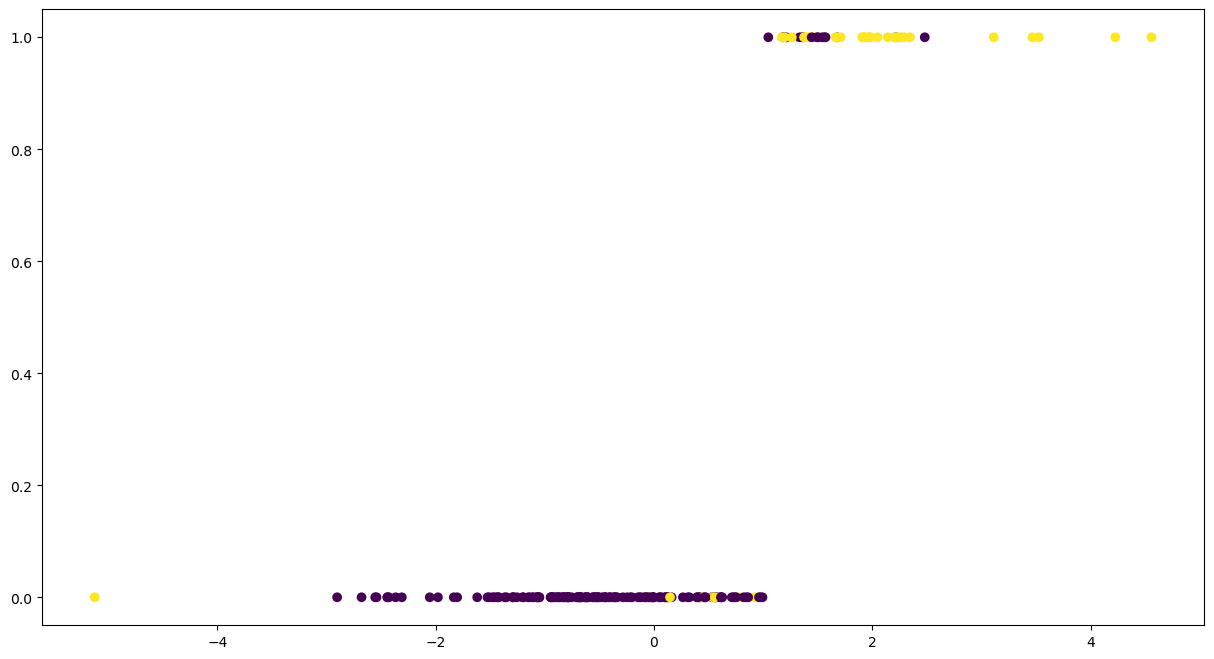

In [11]:
import matplotlib.pyplot as plt
# plot size
plt.figure(figsize=(15, 8))
# plotting the graph
plt.scatter(X_test_lda, y_pred_1 , c= y_test)
plt.show()

In [12]:
# if I Change the prior probability from  [0.74368231 0.25631769] to [0.8,0.2]
LDA_model_prior = LinearDiscriminantAnalysis(priors=[0.8,0.2])
LDA_model_prior.fit(X_train, y_train)
y_pred_LDA_prior =LDA_model_prior.predict(X_test)
performace(y_test,y_pred_LDA_prior)

confusionmatrix:
[[155  12]
 [ 13  28]]
accuracy:0.8798076923076923
precision:0.7
recall:0.6829268292682927
F1-score:0.6913580246913581


# Feature selection

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot


Feature 0: 6436.133223
Feature 1: 31367.363406
Feature 2: 24326.453660
Feature 3: 70435.704304
Feature 4: 59.790763
Feature 5: 81.578670
Feature 6: 4799.176328
Feature 7: 43.876112
Feature 8: 0.009336
Feature 9: 3.488477
Feature 10: 130.224666
Feature 11: 149.558741


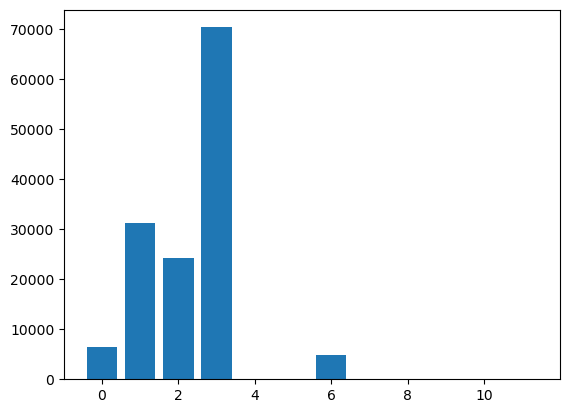

In [14]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
	
# load data
url_train = "train.csv"
train = pd.read_csv(url_train)

train.describe ()
train["Lead"]. replace("Female", 1, inplace = True )
train["Lead"]. replace ("Male", 0, inplace = True )

Y = train["Lead"]
X = train.drop(["Lead","Year"],axis =1)
X = X.astype(float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
# so it means we only want the variable 0,1,2,3,6, namely "'Number words female', 'Total words', 'Number of words lead',
# 'Difference in words lead and co-lead" and 'Number words male'


Feature 0: 3.242632
Feature 1: 7.357733
Feature 2: 10.862665
Feature 3: 27.876178
Feature 4: 32.122517
Feature 5: 69.389958
Feature 6: 1.866371
Feature 7: 0.231107
Feature 8: 0.006525
Feature 9: 1.587839
Feature 10: 34.718073
Feature 11: 38.931766


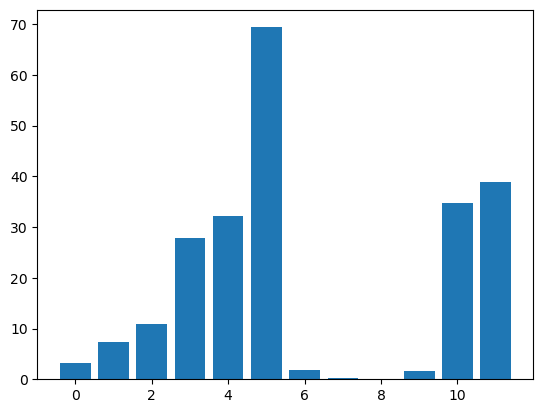

In [15]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [18]:
s = StandardScaler ()
X_reduced = X.iloc[:,[0,1,2,3,4,5,10,11]]
X_reduced.columns
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=1)
# X_train = s. fit_transform (X_train)
# X_test = s. fit_transform (X_test)

LDA_model_default_reduced = LinearDiscriminantAnalysis()
LDA_model_default_reduced.fit(X_train, y_train)
y_pred_LDA_default_reduced =LDA_model_default_reduced.predict(X_test)
performace(y_test,y_pred_LDA_default_reduced) 

confusionmatrix:
[[156  11]
 [ 11  30]]
accuracy:0.8942307692307693
precision:0.7317073170731707
recall:0.7317073170731707
F1-score:0.7317073170731707


## QDA

In [19]:
QDA_model_default = QuadraticDiscriminantAnalysis()
QDA_model_default.fit(X_train, y_train) # Variables are collinear
y_pred_QDA_default =QDA_model_default.predict(X_test)
performace(y_test,y_pred_QDA_default) 

confusionmatrix:
[[155  12]
 [  8  33]]
accuracy:0.9038461538461539
precision:0.7333333333333333
recall:0.8048780487804879
F1-score:0.7674418604651163


In [ ]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_reduced)
calc_vif(X)